# DSCI 503 – Project 04
### Matt Snyder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Part 1: Loading the Dataset; Preliminary Analysis
Load dataset, and begin understanding it by looking at the first few rows

In [2]:
# The data is stored in the tab-delimited text file forest_cover.txt. Download this file into the directory that contains
# your notebook, and then load the data into a DataFrame named fc. 
fc = pd.read_table('forest_cover.txt')

# Use the head() method to display the first 5 rows of this DataFrame.
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


Next, observe that the dataset has 13 features, and over 15,000 rows.  Given that each data point describes a small plot of ground, it is not surprising that it's a huge number of points.

In [3]:
# Print the shape of the fc DataFrame.
fc.shape

(15120, 13)

Next, inspect the distribution of cover types in the datasets.

In [4]:
# Without creating any new DataFrame variables, select the Cover_Type column from fc, then call its value_counts() method,
# followed by the sort_index() method.
sorted_cover_values = fc.loc[:, 'Cover_Type'].value_counts().sort_index()

# Display the result.
sorted_cover_values.head(10)

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

### Seven Colors
Create a list of seven colors to be used as a palette in later plots.

In [5]:
# Create a list named palette containing seven named colors. 
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
Start by determining the distribution of the wilderness areas within our dataset.

In [6]:
# Without creating any new DataFrame variables, select the Wilderness_Area column from fc, then call its
# value_counts() method, followed by the sort_index() method. 
sorted_wilderness_values = fc.loc[:, 'Wilderness_Area'].value_counts().sort_index()

# Display the result.
sorted_wilderness_values.head()

Wilderness_Area
Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: count, dtype: int64

Next, create a DataFrame to determine the how many regions of each cover type are in each of the four wilderness areas.

In [7]:
# Use pd.crosstab() to count the number of regions of each cover type that are in each of the four wilderness areas.
# Pass this function the Cover_Type column as its first argument and the Wilderness_Area column as the second
# argument. Store the results in a DataFrame named ct_by_wa
ct_by_wa = pd.crosstab(fc.loc[:, 'Cover_Type'], fc.loc[:, 'Wilderness_Area'])

# and then display this DataFrame.
ct_by_wa.head(10)

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


Next, visually represent the information in the above DataFrame, in the form of a stacked bar chart.

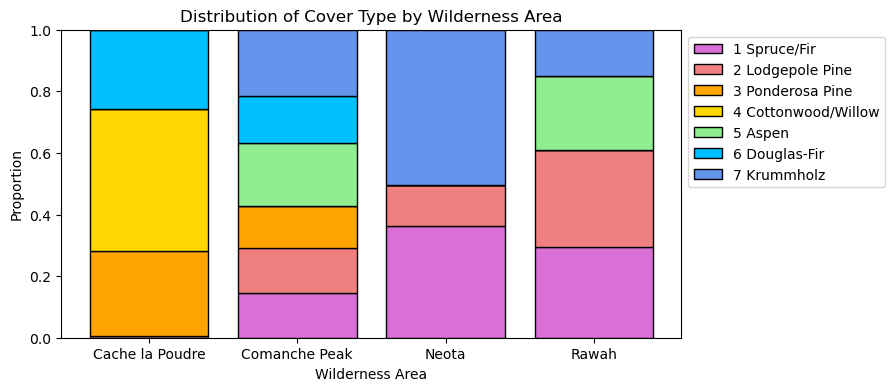

In [8]:
# Start by converting the count information into proportions. Create a DataFrame named ct_by_wa_props by
# dividing ct_by_wa by the column sums of ct_by_wa. 
cyl_sums = ct_by_wa.sum()
ct_by_wa_props = ct_by_wa / cyl_sums

# We will be creating a stacked bar chart, so we need to know where the bottom of each bar should be located.
# This can be calculated as follow: 
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props
# Create a Matplotlib figure, setting the figure size to [8, 4].
plt.figure(figsize=[8,4])

# add a cover type string value for the plot legend
cover_type_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 
                    'Aspen', 'Douglas-Fir', 'Krummholz']

# Loop over the rows of ct_by_wa_props. Each time this loop executes, add a bar chart to the figure
for i in range(0, len(ct_by_wa.iloc[:,0])):
    # The height of the bars should be determined by the current row of ct_by_wa_props.
    bar_height = ct_by_wa_props.iloc[i, :]
    # The bottom position of each bar should be determined by the current row of bb.
    bar_bottom = bb.iloc[i]
    # Each bar should have a black border, and a fill color determined by the current value of palette.
    color = palette[i]
    # The label for the legend should be set to the value of Cover_Type associated with the current row.
    label = f'{ct_by_wa.index[i]} {cover_type_names[ct_by_wa.index[i] - 1]}'
    plt.bar(x=ct_by_wa.columns, height=bar_height, color=color, 
            edgecolor='black', bottom=bar_bottom, label=label)

    
# Set the labels for the x and y axes to be "Wilderness Area" and "Proportion". 
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')

# Set the title to be "Distribution of Cover Type by Wilderness Area"
plt.title('Distribution of Cover Type by Wilderness Area')

# Add a legend to the plot. 
plt.legend()

# Set the bbox_to_anchor parameter to place the legend to the right of the plot, near the top.
plt.legend(bbox_to_anchor=(1, 1))

# Display the figure using plt.show().
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
Start by creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types.

In [9]:
# Use pd.crosstab() to count the number of regions of each cover type there are for each of the 40 soil types. Pass this
# function the Cover_Type column as its first argument and the Soil_Type column as the second argument. Store the
# results in a DataFrame named ct_by_st 
ct_by_st = pd.crosstab(fc.loc[:, 'Cover_Type'], fc.loc[:, 'Soil_Type'])

# and then display this DataFrame.
ct_by_st.head(10)

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


Next, visually represent the information in the DataFrame, in the form of a stacked bar chart.

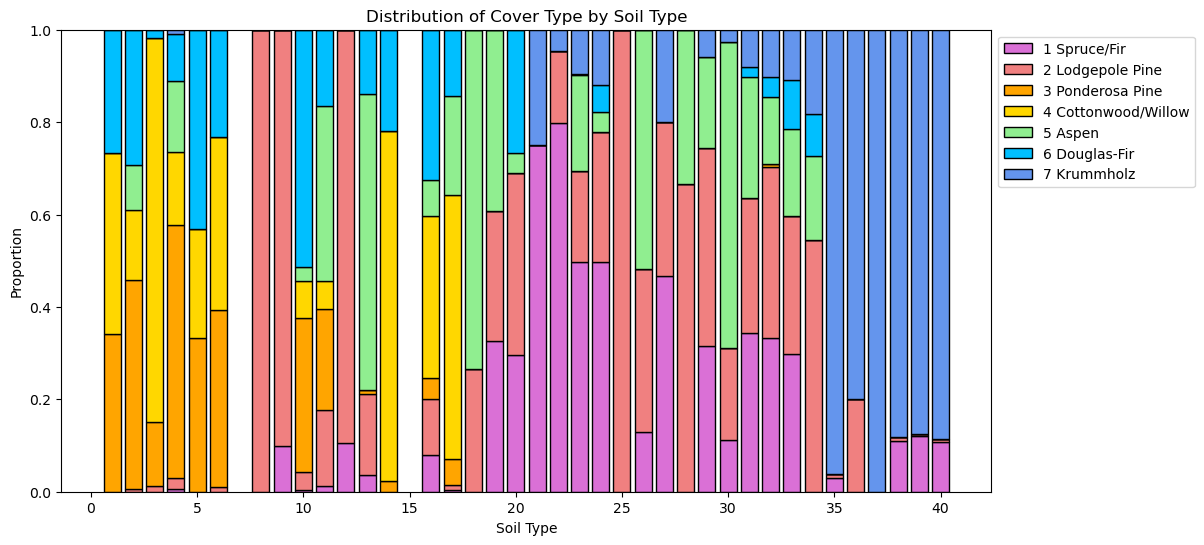

In [10]:
# Use ct_by_st instead of ct_by_wa, and compute proportions
cyl_sums = ct_by_st.sum()
# Use ct_by_st_props instead of ct_by_wa_props.
ct_by_st_props = ct_by_st / cyl_sums
bb = np.cumsum(ct_by_st_props) - ct_by_st_props

# Set the figure size to be [12,6].
plt.figure(figsize=[12,6])

for i in range(0, len(ct_by_st.iloc[:,0])):
    bar_height = ct_by_st_props.iloc[i, :]
    bar_bottom = bb.iloc[i]
    color = palette[i]
    label = f'{ct_by_st.index[i]} {cover_type_names[ct_by_st.index[i] - 1]}'
    plt.bar(x=ct_by_st.columns, height=bar_height, color=color, 
            edgecolor='black', bottom=bar_bottom, label=label)

    
# Change the words "Wilderness Area" to "Soil Type" in the x-axis label and in the title.
plt.xlabel('Soil Type')
plt.ylabel('Proportion')

plt.title('Distribution of Cover Type by Soil Type')

# Add a legend to the plot. 
plt.legend()

# Set the bbox_to_anchor parameter to place the legend to the right of the plot, near the top.
plt.legend(bbox_to_anchor=(1, 1))

# Display the figure using plt.show().
plt.show()

## Part 4: Distribution of Elevation by Cover Type
Start by calculating the average elevation for each of the seven cover types.

In [11]:
# Select the Elevation and Cover_Type columns from fc, group the rows by Cover_Type, and then calculate the
# mean Elevation for each group. 
mean_elevations = fc.loc[:, ['Elevation', 'Cover_Type']].\
    groupby('Cover_Type').mean()

# Display the resulting DataFrame.
mean_elevations.head(10)

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


Next, create histograms to visually explore the distribution of elevations for each of the seven cover types.

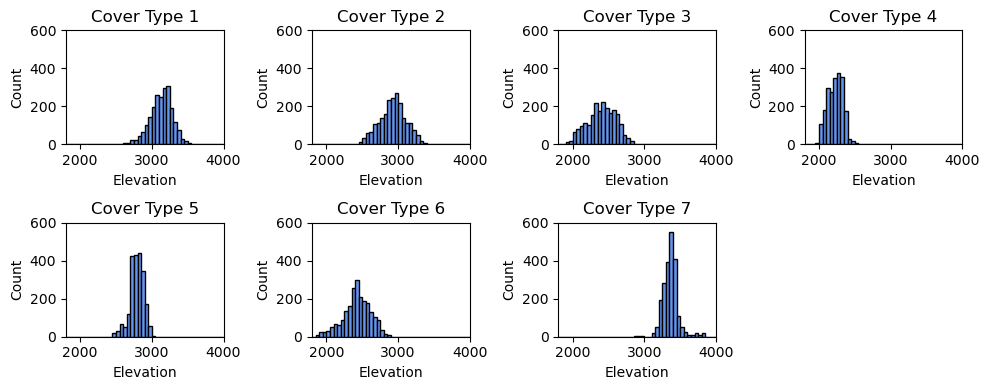

In [12]:
# Create a figure containing seven subplots arranged in a 2x4 grid (the bottom right subplot will be empty). Each of the
# subplots should contain a histogram of elevations for regions with one specific cover type. This can be accomplished with
# the following steps:

# Set a figure size of [12,6].
plt.figure(figsize=[10,4])

# Loop over the possible values of Cover_Type (which are integers, 1 – 7). 
for i in range(1,8):
    
    # Create a new subplot.
    plt.subplot(2,4,i) # seven subplots arranged in a 2x4 grid
    
    # Add a histogram of Elevation, using only the observations corresponding to the current value of Cover_Type. 
    sel = fc.loc[:,'Cover_Type'] == i
    
    # Set bins=np.arange(1800, 4050, 50) and set the fill color for the bars to be
    # equal to the corresponding color in palette. 
    plt.hist(x=fc.loc[sel, 'Elevation'].values, 
         bins=np.arange(1800, 4050, 50), 
         edgecolor='k', color='cornflowerblue')
    
    # Set the title of the subplot to be "Cover Type X", with "X" replaced by the appropriate integer.
    plt.title(f'Cover Type {i}')
    
    # Set the x-limits to [1800,4000] and set the y-limits to be [0,600].
    plt.xlim([1800,4000])
    plt.ylim([0, 600])    
    
    # Set the axis labels for each subplot to "Elevation" and "Count".
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    
    
# After the loop finishes, call plt.tight_layout(), and then use plt.show() to display the figure.
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
Start by separating the categorical features, the numerical features, and the labels.

In [13]:
# Create a 2D array named X_num by selecting the columns of fc that represent numerical features.
categorical_columns = ['Wilderness_Area', 'Soil_Type']
mask = ~np.isin(fc.columns, categorical_columns) # bitwise-not of is-in categorical column list
numerical_columns = fc.columns[mask]
X_num_df = fc.loc[:, numerical_columns[:-1]] # omit Cover_Type column, which is last
X_num = X_num_df.values

# Create a 2D array named X_cat by selecting the columns of fc that represent categorical features.
X_cat = fc.loc[:, categorical_columns].values

# Create a 1D array named y by selecting the column of fc corresponding to the labels.
y = fc.loc[:, 'Cover_Type'].values

# Print the shapes of all three of these arrays with messages as shown below.
print (f'Numerical Feature Array Shape:   {X_num.shape}')
print (f'Categorical Feature Array Shape: {X_cat.shape}')
print (f'Label Array Shape:               {y.shape}')

Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)


Next, encode the categorical variables using one-hot encoding.

In [14]:
# Create a OneHotEncoder() object setting sparse=False.
encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the categorical features.
encoder.fit(X_cat)

# Use the encoder to encode the categorical features, storing the result in a variable named X_enc.
X_enc = encoder.transform(X_cat)

# Print the shape of X_enc with a message as shown below.
print (f'Encoded Feature Array Shape: {X_enc.shape}')

Encoded Feature Array Shape: (15120, 42)


Next, combine the numerical features with the encoded features.

In [15]:
# Use np.hstack to combine X_num and X_enc into a single array named X.
X = np.hstack([X_num, X_enc])

# Print the shape of X with a message as shown below.
print (f'Feature Array Shape: {X.shape}')

Feature Array Shape: (15120, 52)


Next, split the data into training, validation, and test sets, using a 70/15/15 split.

In [16]:
# Use train_test_split() to split the data into training and holdout sets using an 70/30 split. Name the
# resulting arrays X_train, X_hold, y_train, and y_hold. Set random state=1. Use stratified sampling.
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

# Use train_test_split() to split the holdout data into validation and test sets using a 50/50 split. Name the
# resulting arrays X_valid, X_test, y_valid, and y_test. Set random state=1. Use stratified sampling.
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size = 0.5, random_state=1, stratify=y_hold)

# • Print the shapes of X_train, X_valid, and X_test with messages as shown below.
print (f'Training Features Shape:   {X_train.shape}')
print (f'Validation Features Shape: {X_valid.shape}')
print (f'Test Features Shape:       {X_test.shape}')

Training Features Shape:   (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape:       (2268, 52)


## Part 6: Logistic Regression Model
Make a model that attempts to predict which of the seven types of cover are present in the plot, using logistic regression

In [17]:
# Create a logistic regression model named lr_mod setting solver='lbfgs', max_iter=1000, Set penalty='none'
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, penalty=None) # multi_class='multinomial' is default

# Fit your model to the training data.
lr_mod.fit(X_train, y_train)

# Calculate the training and validation accuracy with messages as shown below. Round the scores to 4 decimal places.
train_r2 = lr_mod.score(X_train, y_train)
valid_r2 = lr_mod.score(X_valid, y_valid)
print (f'Training Accuracy:   {round(train_r2, 4)}')
print (f'Validation Accuracy: {round(valid_r2, 4)}')

Training Accuracy:   0.6126
Validation Accuracy: 0.6164


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models
Make another model to predict cover, this time using using a series of Decision Trees with varying depth

In [18]:
# Create empty lists named dt_train_acc and dt_valid_acc. 
dt_train_acc = []
dt_valid_acc = []

# Create a range variable named depth_range to represent a sequence of integers from 2 to 30.
depth_range = range(2, 31)

# Loop over the values in depth_range.
for i in depth_range:
    # Use NumPy to set a random seed of 1. This should be done inside the loop.
    np.random.seed(1)
    
    # Create a decision tree model named temp_tree with max_depth equal to the current value from depth_range that is being considered.
    temp_tree = DecisionTreeClassifier(max_depth=i)
    
    # Fit the model to the training data.
    temp_tree.fit(X_train, y_train)
    
    # Calculate the training and validation accuracy for temp_tree, appending the resulting values to the appropriate lists.
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))

# Use np.argmax to determine the index of the maximum value in dt_valid_acc. Store the result in dt_idx.
dt_idx = np.argmax(dt_valid_acc)

# Use dt_idx and depth_range to find the optimal value for the max_depth hyperparameter. Store the result in dt_opt_depth.
dt_opt_depth = depth_range[dt_idx]

# Use dt_idx with the lists dt_train_acc and dt_valid_acc to determine the training and validation
# accuracies for the optimal model found.
opt_train_acc = dt_train_acc[dt_idx]
opt_valid_acc = dt_valid_acc[dt_idx]

# Display the values found in Steps 5 and 6 with messages as shown below. Round the accuracy scores to 4 decimal places.
print (f'Optimal value for max_depth:           {dt_opt_depth}')
print (f'Training Accuracy for Optimal Model:   {round(opt_train_acc, 4)}')
print (f'Validation Accuracy for Optimal Model: {round(opt_valid_acc, 4)}')

Optimal value for max_depth:           18
Training Accuracy for Optimal Model:   0.9804
Validation Accuracy for Optimal Model: 0.772


### Plot Validation Curve
Plot the training and validation curves as a function of max_depth, so that the peak of the validation curve can be confirmed

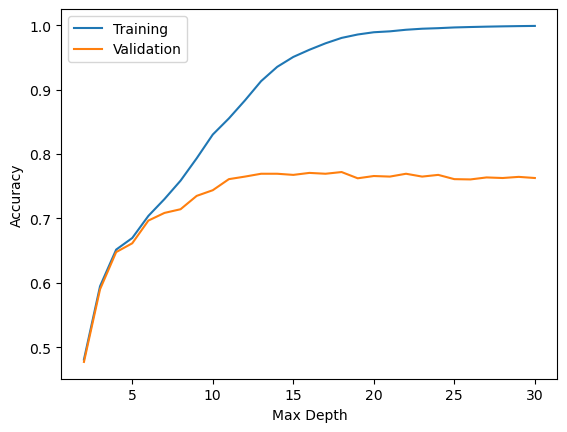

In [19]:
# Create a figure with two line plots on the same set of axes. One line plot should plot values of dt_train_acc against depth_range 
# The plot should contain a legend with two items that read "Training"
plt.plot(depth_range, dt_train_acc, label='Training')

# and the other should plot values of dt_valid_acc against depth_range. 
# label "Validation" for legend
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.legend()

# The x-axis should be labeled "Max Depth" and the y-axis should be labeled "Accuracy".  
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.show()

## Part 8: Random Forest Models
Make a third model to predict cover, using a series of random forest models with varying depth

In [20]:
# Create empty lists named rf_train_acc and rf_valid_acc. 
rf_train_acc = []
rf_valid_acc = []

# Loop over the values in depth_range (from Part 7). 
for i in depth_range:
    # Use NumPy to set a random seed of 1. This should be done inside the loop.
    np.random.seed(1)
    
    # Create a decision tree model named temp_forest with max_depth equal to the current value from
    # depth_range that is being considered. Set the parameter n_estimators to 100.
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=i)
    
    # Fit the model to the training data.
    temp_forest.fit(X_train, y_train)
    
    # Calculate the training and validation accuracy for temp_forest, appending the resulting values to the appropriate lists.
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))
    
# Use np.argmax to determine the index of the maximum value in rf_valid_acc. Store the result in rf_idx.
rf_idx = np.argmax(rf_valid_acc)

# Use rf_idx and depth_range to find the optimal value for the max_depth hyperparameter. Store the result in rf_opt_depth.
rf_opt_depth = depth_range[rf_idx]

# Use rf_idx with the lists rf_train_acc and rf_valid_acc to determine the training and validation accuracies for the optimal model found.
opt_train_acc = rf_train_acc[rf_idx]
opt_valid_acc = rf_valid_acc[rf_idx]

# 6. Display the values found in Steps 4 and 5 with messages as shown below. Round the accuracy scores to 4 decimal places.
print (f'Optimal value for max_depth:           {rf_opt_depth}')
print (f'Training Accuracy for Optimal Model:   {round(opt_train_acc, 4)}')
print (f'Validation Accuracy for Optimal Model: {round(opt_valid_acc, 4)}')

Optimal value for max_depth:           28
Training Accuracy for Optimal Model:   1.0
Validation Accuracy for Optimal Model: 0.8677


### Plot Validation Curve
Plot the training and validation curves as a function of max_depth, so that the peak of the validation curve can be confirmed

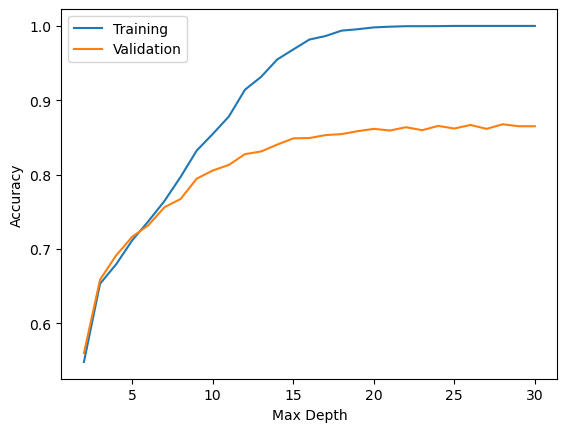

In [21]:
# Create a figure with two line plots on the same set of axes. One line plot should plot values of rf_train_acc against depth_range
# The plot should contain a legend with two items that read "Training" 
plt.plot(depth_range, rf_train_acc, label='Training')

# and the other should plot values of rf_valid_acc against depth_range. 
# label "Validation" for legend
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.legend()

# The x-axis should be labeled "Max Depth" and the y-axis should be labeled "Accuracy". 
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.show()

## Part 9: Random Forest Models
The logistic regression model, even with all of the categorical features encoded, gave a validation accuracy score of only 61%.  The decision tree model gave a validation accuracy score of 77%.  The model with the best validation accuracy is the random forest model, with a score of 86.7%.  Therefore we select the random forest model as our final model, using maximum depth of 28.

In [22]:
# If your final model is a decision tree or random forest model, use NumPy to set a random seed of 1.
np.random.seed(1)

# Recreate the best model you found, using the parameter values that produced that model. Store the resulting
# model in a variable named final_model.
final_model = RandomForestClassifier(n_estimators=100, max_depth=28)

# Fit this model to the training set.
final_model.fit(X_train, y_train)

# Print the training accuracy, validation accuracy, and test accuracy for the final model with messages as shown
# below. Round the accuracy scores to four decimal places.
train_acc = final_model.score(X_train, y_train)
valid_acc = final_model.score(X_valid, y_valid)
test_acc = final_model.score(X_test, y_test)

print (f'Training Accuracy for Final Model:   {train_acc}')
print (f'Validation Accuracy for Final Model: {round(valid_acc, 4)}')
print (f'Testing Accuracy for Final Model:    {round(test_acc, 4)}')

Training Accuracy for Final Model:   1.0
Validation Accuracy for Final Model: 0.8677
Testing Accuracy for Final Model:    0.8593


### Confusion Matrix
Create and display a confusion matrix detailing the model's performance on the test set.

In [23]:
# Use your final model to generate predictions for the test set, storing them in a variable named test_pred.
test_pred = final_model.predict(X_test)

# Create a confusion matrix by passing y_test and test_pred to the function confusion_matrix() from Scikit-Learn. This
# function returns a NumPy array. Store this array in a variable, 
cm = confusion_matrix(y_test, test_pred)

# ...and then convert it to a DataFrame with row and column names being set equal to the valid labels (i.e. the integers 1 – 7). Display the resulting DataFrame.
cm_df = pd.DataFrame(cm, index=range(1,8), columns=range(1,8))
cm_df.head(10)

,1,2,3,4,5,6,7
1,236,63,2,0,5,0,18
2,53,239,6,0,13,10,3
3,0,2,262,18,2,40,0
4,0,0,6,313,0,5,0
5,0,11,4,0,305,4,0
6,0,0,33,11,1,279,0
7,8,1,0,0,0,0,315


### Classification Report
Generate a classification report to provide further insight into the model's performance on the test set.

In [24]:
# Pass the arrays y_test and test_pred to the function classification_report(), printing the result.
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       324
           2       0.76      0.74      0.75       324
           3       0.84      0.81      0.82       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.86      0.84       324
           7       0.94      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

